In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, re
import csv
import copy
from matplotlib.pyplot import imshow
from mlp import SingleLayerSingleTaskMLP as SS
from mlp import TwoLayerSingleTaskMLP as TS
from mlp import TwoLayerTwoTaskMLP as TT
from mlp import SoftmaxCrossEntropyLoss
from mlp import random_normal_weight_init, random_weight_init
from mlp import zeros_bias_init, labels2onehot

In [2]:
trainX_ = np.load('trainX.npy')
trainy = np.load('trainy.npy')
testX = np.load('testX.npy')
testy = np.load('testy.npy')

train_size = len(trainX_)
test_size = len(testX)

In [3]:
std = np.where(np.std(trainX_, axis=0) == 0, 1, (np.std(trainX_, axis=0)))

trainX = (trainX_ - np.average(trainX_, axis=0))/std
testX = (testX - np.average(trainX_, axis=0))/std

In [4]:
# image_shape = (-1, 56)

# for i in range(1):
#     A = np.reshape(trainX[i], image_shape)
#     imshow(A)
#     plt.show()

In [5]:
inp = trainX.shape[1]
outp = 10
hiddenlayer = 100

seed = 10417617
np.random.seed(seed)

### init weight ###
w1 = random_weight_init(inp, hiddenlayer)
w2 = random_weight_init(hiddenlayer, outp)
b1 = zeros_bias_init(hiddenlayer)
b2 = zeros_bias_init(outp)

In [6]:
trainy1 = labels2onehot(trainy[:,0])
testy1 = labels2onehot(testy[:,0])

In [7]:
set1 = [inp,outp,hiddenlayer,0,0,0.001]
set2 = [inp,outp,hiddenlayer,0.5,0,0.001]
set3 = [inp,outp,hiddenlayer,0.5,0.3,0.001]

In [8]:
### AAAAAAAA ###

In [9]:
task1 = []
task1.append(SS(*set1))
task1.append(SS(*set2))
task1.append(SS(*set3))

soft = SoftmaxCrossEntropyLoss()

In [10]:
def minibatch(obj, epoch, batch_size):
    trlosses = []
    telosses = []
    tracc = []
    teacc = []

    for i in range(epoch):
        zipped = list(zip(trainX, trainy1))
        np.random.shuffle(zipped)
        X_result, y_result = zip(*zipped)
        X_shuffled = np.asarray(X_result) 
        y_shuffled = np.asarray(y_result)
        
        for j in range(train_size//batch_size):
            X_batch = X_shuffled[j*batch_size:(j+1)*batch_size].T
            y_batch = y_shuffled[j*batch_size:(j+1)*batch_size].T
            trpresoft = obj.forward(X_batch, train=True)
            soft.forward(trpresoft, y_batch)
            bkp1 = soft.backward()
            obj.backward(bkp1)
            obj.step()
        
        trpresoft = obj.forward(trainX.T, train=False)
        trloss = soft.forward(trpresoft, trainy1.T)
        trplabel = np.argmax(soft.p.T, axis=1)
        tracc.append(np.sum(trplabel == trainy[:,0])/len(trainX))

        tepresoft = obj.forward(testX.T, train=False)
        teloss = soft.forward(tepresoft, testy1.T)
        teplabel = np.argmax(soft.p.T, axis=1)
        teacc.append(np.sum(teplabel == testy[:,0])/len(testX))

        trlosses.append(trloss)
        telosses.append(teloss)
        
        print('epoch {}'.format(i))
        
    return [trlosses, telosses, tracc, teacc]

In [11]:
batch_size = 32
epoch = 10

In [12]:
task1[0].loadparams([w1, w2], [b1, b2])

In [13]:
trlosses0, telosses0, tracc0, teacc0 = minibatch(task1[0], epoch, batch_size)

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9


0.5206


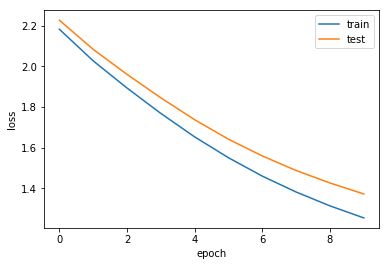

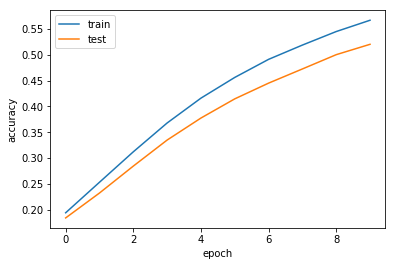

In [14]:
print(teacc0[-1])

plt.plot(trlosses0, '-')
plt.plot(telosses0, '-')
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(tracc0, '-')
plt.plot(teacc0, '-')
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [15]:
task1[1].loadparams([w1, w2], [b1, b2])

In [16]:
trlosses1, telosses1, tracc1, teacc1 = minibatch(task1[1], epoch, batch_size)

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9


0.5226


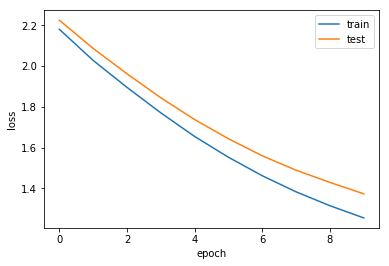

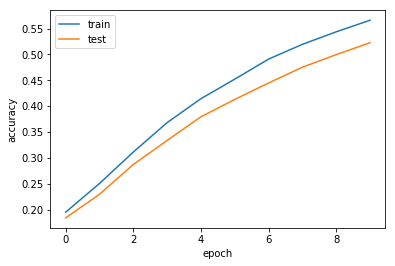

In [17]:
print(teacc1[-1])

plt.plot(trlosses1, '-')
plt.plot(telosses1, '-')
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(tracc1, '-')
plt.plot(teacc1, '-')
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [18]:
task1[2].loadparams([w1, w2], [b1, b2])

In [19]:
trlosses2, telosses2, tracc2, teacc2 = minibatch(task1[2], epoch, batch_size)

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9


0.4006


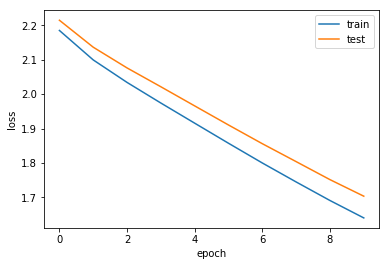

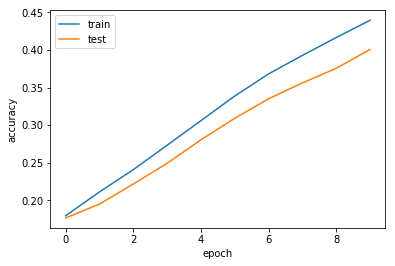

In [20]:
print(teacc2[-1])

plt.plot(trlosses2, '-')
plt.plot(telosses2, '-')
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(tracc2, '-')
plt.plot(teacc2, '-')
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

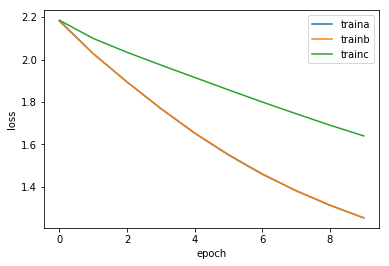

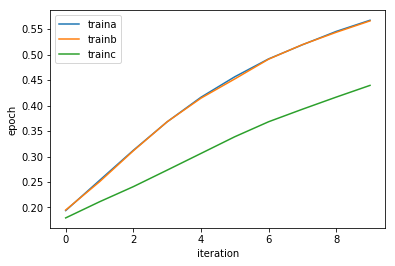

In [21]:
plt.plot(trlosses0, '-')
# plt.plot(telosses0, '-')
plt.plot(trlosses1, '-')
# plt.plot(telosses1, '-')
plt.plot(trlosses2, '-')
# plt.plot(telosses2, '-')
# plt.legend(['train1','test1', 'train2','test2', 'train3','test3'])
plt.legend(['traina', 'trainb', 'trainc'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(tracc0, '-')
# plt.plot(teacc0, '-')
plt.plot(tracc1, '-')
# plt.plot(teacc1, '-')
plt.plot(tracc2, '-')
# plt.plot(teacc2, '-')
# plt.legend(['train1','test1', 'train2','test2', 'train3','test3'])
plt.legend(['traina', 'trainb', 'trainc'])
plt.xlabel('iteration')
plt.ylabel('epoch')
plt.show()